In [51]:
import os
import sys
import pandas as pd
sys.path.insert(0, os.path.abspath('../lib'))

import config
import librosa
import librosa.display


import numpy as np

# Troubleshooting and visualisation
import IPython.display as ipd
from IPython.display import Audio 
from IPython.core.display import display
import matplotlib.pyplot as plt


# Data visualisation tool

In [7]:
# Select IHI Tanzania cup data to use for multi-species classification

df = pd.read_csv(config.data_df)
idx_multiclass = np.logical_and(df['country'] == 'Tanzania', df['location_type'] == 'cup')
df_all = df[idx_multiclass]

In [8]:
# Select list of classes with sufficient samples for significant analysis. Ordered with similar groups in adjacent classes.

classes = ['an arabiensis','culex pipiens complex', 'ae aegypti','an funestus ss','an squamosus',
               'an coustani','ma uniformis','ma africanus']

In [57]:
# Return number of samples in class to choose sample number in visualisation tool:

print('Number of audio clips for species:')
for index in range(len(classes)):
    print(index, ':', classes[index], ':', len(df_all[df_all['species'] == classes[index]]))

Number of audio clips for species:
0 : an arabiensis : 831
1 : culex pipiens complex : 545
2 : ae aegypti : 89
3 : an funestus ss : 381
4 : an squamosus : 141
5 : an coustani : 92
6 : ma uniformis : 131
7 : ma africanus : 78


In [176]:
def display_audio_spec_mozz(df_all, sample_number, species, rate):
    '''Display spectrogram and play audio for a certain clip of a mosquito species within dataframe `df_all`. This 
    example script uses indexing to retrieve results for Tanzanian cup data, but may be used for any audio in the database
    by selecting any condition from the metadata.'''
    df_match = df_all[df_all['species'] == species]
    df_class_sample = df_match.iloc[sample_number]
    _, file_format = os.path.splitext(df_class_sample['name'])
    filename = os.path.join(config.data_dir, str(df_class_sample['id']) + file_format)
    signal, rate = librosa.load(filename, sr=rate)
    D = librosa.stft(signal)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots(figsize=(15,8))
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, sr =rate)
    ax.set(title=species + ': clip ' + str(sample_number) + ' of ' + str(len(df_match)-1))
    # fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.show()
    display(Audio(signal, rate=rate))

## Play audio and visualise spectrogram

Let us now visualise the audio with a spectrogram, and also play the corresponding audio clip. Recommended default to re-sample the features to `rate` of 16,000 Hz to more clearly visualise mosquito harmonics and ignore high-frequency noise. The audio will be played re-sampled to match the visual representation. The native sample rate of this audio is 44,100 Hz, retrieved when `rate = None`.

Choose any sample number within the range as illustrated in the cell above. As these data have been tagged by a BCNN with our  [open-source utility](https://github.com/HumBug-Mosquito/MozzBNN), some sections may contain entomologist speech or other sound/silence. For more information about the model used, please consult our publication [Automatic Acoustic Mosquito Tagging with Bayesian Neural Networks](https://rdcu.be/cyMQd).

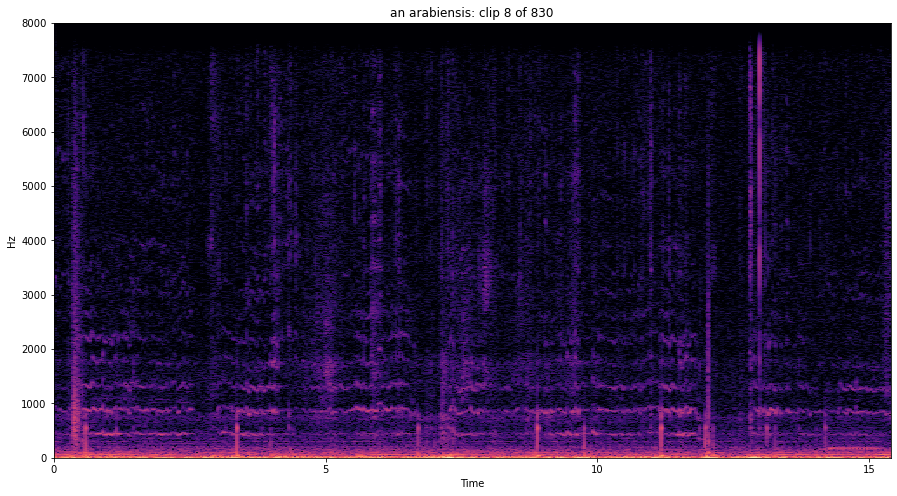

In [144]:
display_audio_spec_mozz(df_all, 8, classes[0], 16000)

# Frequency spectrum comparisons

In this section we will select a few clips manually to display spectra with the time component removed. Note that this is just a quick overview and may not be representative of the frequency distribution across all the species. Nevertheless, we choose not to use smoothed spectra due to the variability encountered amongst individuals.

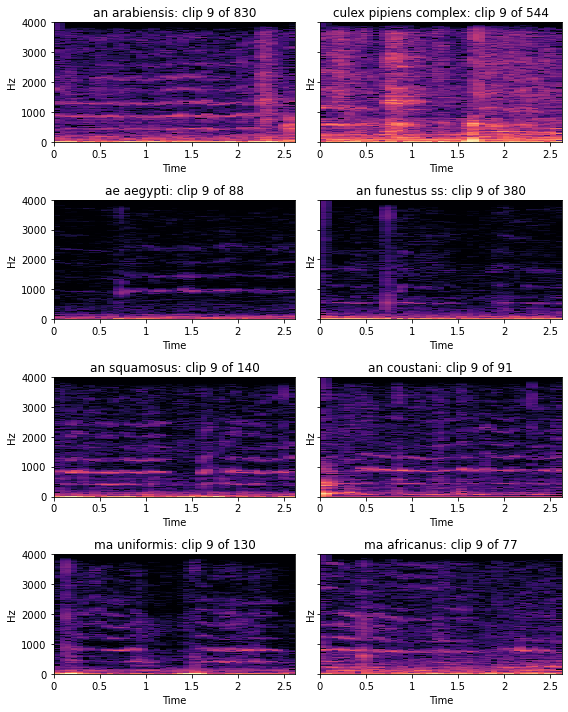

In [214]:
sample_number = 9
rate = 8000

fig, axs = plt.subplots(4, 2, sharey=True, figsize=(8,10))


for ax, species in zip(axs.ravel(), classes):
    df_match = df_all[df_all['species'] == species]
    df_class_sample = df_match.iloc[sample_number]
    _, file_format = os.path.splitext(df_class_sample['name'])
    filename = os.path.join(config.data_dir, str(df_class_sample['id']) + file_format)
    signal, rate = librosa.load(filename, sr=rate, duration=2.56)
    D = librosa.stft(signal)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, sr =rate)
    ax.set(title=species + ': clip ' + str(sample_number) + ' of ' + str(len(df_match)-1))
#     ax.psd(signal, Fs=rate, label=species, return_line=True, detrend='linear', lw=1)
#     ax.set_ylabel('')
#     ax.set_xlabel('')
#     ax.set_xlim([200,4000])
    
    # Restrict limits to filter out high frequency, and low frequency noise. Highest resolvable frequency fs/2 (4000 Hz in 
    # this example)
# plt.ylim([-119, -69])
# plt.xlim([200, 4000])
plt.tight_layout()
# plt.savefig('../outputs/plots/reproducibility/supplement/species_spec.pdf')
plt.show()
    
#     display_audio_spec_mozz(df_all, 8, species, 16000)

In [171]:
def display_fft_mozz(df_all, sample_number, species, rate):
    '''Display spectrogram and play audio for a certain clip of a mosquito species within dataframe `df_all`. This 
    example script uses indexing to retrieve results for Tanzanian cup data, but may be used for any audio in the database
    by selecting any condition from the metadata.'''
    df_match = df_all[df_all['species'] == species]
    df_class_sample = df_match.iloc[sample_number]
    _, file_format = os.path.splitext(df_class_sample['name'])
    filename = os.path.join(config.data_dir, str(df_class_sample['id']) + file_format)
    signal, rate = librosa.load(filename, sr=rate)
    plt.psd(signal, Fs=rate, label=species, detrend='linear')
#     plt.show()